img_id 00140 label armchair, id 1


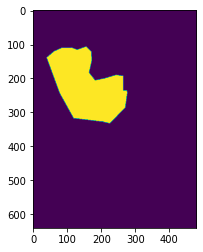

img_id 00097 label jacket, id 2


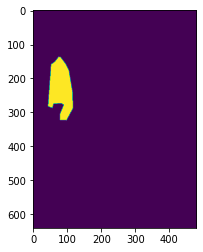

img_id 00106 label sidetable, id 3


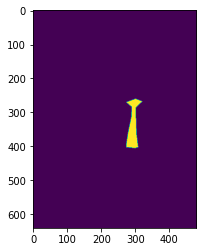

img_id 00103 label hamper, id 4


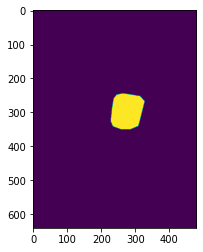

img_id 00087 label plant, id 5


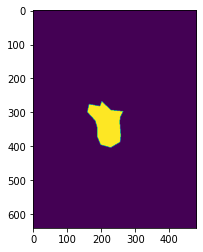

In [3]:
# convert labelme annots folder to seg

import os
import json
import labelme
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# root_dir = '/home/locobotm/explore_data/default/0/'
root_dir = '/home/locobotm/home2_data/0'
annots = os.path.join(root_dir, 'annots')
out_dir = os.path.join(root_dir, 'seg')
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    
labels = defaultdict(int)
def get_label_id(label):
    if label in labels:
        return labels[label]
    new_id = len(labels.keys()) + 1
    labels[label] = new_id 
    return labels[label]
    
for x in os.listdir(annots):
    with open(os.path.join(annots, x), 'rb') as f:
        dat = json.load(f)
    
    img_id = x.split('.')[0]
#     print(dat)
#     print(dat['imageData'])
    label = dat['shapes'][0]['label']
    label_id = get_label_id(label)
    print(f'img_id {img_id} label {label}, id {label_id}')
    png = labelme.utils.img_b64_to_arr(dat['imageData'])
    mask = labelme.utils.shape_to_mask(png.shape, dat['shapes'][0]['points'])
    mask[mask == True] = label_id
    mask[mask == False] = 0
    
#     print(mask)
    plt.imshow(mask)
    plt.show()
    
    out_f = os.path.join(out_dir, f'{img_id}.npy')
    np.save(out_f, mask)
#     print(dat)

In [4]:
import labelme

In [ ]:
labelme.utils.img_data_to_png_data